# **1.Importar las librerías necesarias**
Al trabajar en google colaboratory no nos hará falta instalar las librerías. Si lo tuvieramos que hacer, nos bastaría con ejecutar los seguientes comandos:


*   Por terminal (pip install 'Librería deseada')
*   En el notebook (!pip install 'Librería deseada')




In [1098]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  MinMaxScaler
import joblib
import sys

# **2.Cargar el dataset**

In [1099]:
df = sns.load_dataset('tips')

# **3.Explorarción y preprocesado del dataset**


In [1100]:
# Visualizar las diez primeras filas del dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [1101]:
# Visualizar las diez últimas filas del dataframe
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [1102]:
# Tamaño del dataset
df.shape

(244, 7)

In [1103]:
# Estadísticas básicas del dataset
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [1104]:
# Información de la infrastructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [1105]:
# Información sobre nulos en el dataset
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Selección de datos

In [1106]:

# Seleccionar columnas cuyo tipo de datos sea 'float64' o 'int64'(Númericas)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# La variable 'numeric_cols' ahora contiene los nombres de las columnas que tienen tipos de datos 'float64' o 'int64'
numeric_cols

Index(['total_bill', 'tip', 'size'], dtype='object')

In [1107]:
# Seleccionar columnas cuyo tipo de datos sea 'object' o 'category'()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# La variable 'categorical_cols' ahora contiene los nombres de las columnas que tienen tipos de datos 'object' o 'category'
categorical_cols

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [1108]:
# Crear un imputador para valores numéricos utilizando la mediana como estrategia de imputación
imputer_num = SimpleImputer(strategy='median')

# Aplicar la imputación a las columnas numéricas del DataFrame
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# El imputador SimpleImputer se utiliza para rellenar los valores faltantes en las columnas numéricas.
# En este caso, se utiliza la estrategia de 'median' (mediana) para calcular los valores de imputación.
# La función fit_transform ajusta el imputador a los datos y realiza la imputación en el DataFrame.


In [1109]:
# Crear un imputador SimpleImputer para valores categóricos utilizando la estrategia 'most_frequent' (más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Aplicar la imputación a las columnas categóricas del DataFrame
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

 # Encoding

In [1110]:
# Aplicar codificación a las variables categóricas en el DataFrame
# drop_first=True elimina la primera columna de cada conjunto de dummies para evitar la multicolinealidad
df = pd.get_dummies(df, drop_first=True)

# La codificación convierte las variables categóricas en un formato binario,
# creando columnas adicionales para cada categoría con valores binarios (0 o 1).
# El parámetro drop_first=True se utiliza para evitar la trampa de la multicolinealidad,
# eliminando la primera columna de cada conjunto de dummies, ya que su información
# puede deducirse de las demás columnas.

df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2.0,0,0,0,1,0,0
1,10.34,1.66,3.0,1,0,0,1,0,0
2,21.01,3.50,3.0,1,0,0,1,0,0
3,23.68,3.31,2.0,1,0,0,1,0,0
4,24.59,3.61,4.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3.0,1,0,1,0,0,0
240,27.18,2.00,2.0,0,1,1,0,0,0
241,22.67,2.00,2.0,1,1,1,0,0,0
242,17.82,1.75,2.0,1,0,1,0,0,0


# Visualización univariante

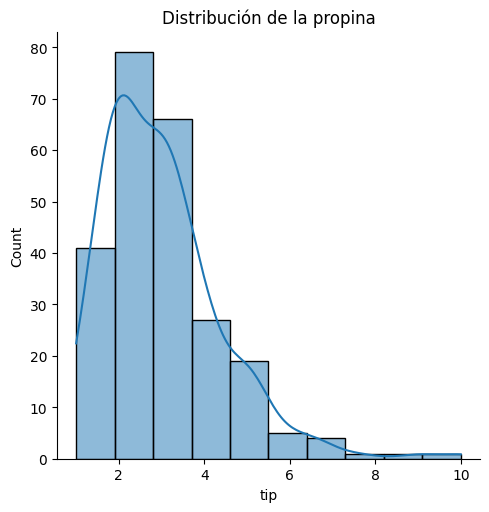

In [1111]:
# Crear un histograma y un gráfico de densidad para la columna "tip" del DataFrame
sns.displot(df["tip"], kde=True, bins=10)

# Añadir un título a la gráfica
plt.title('Distribución de la propina')

# Mostrar la gráfica
plt.show()

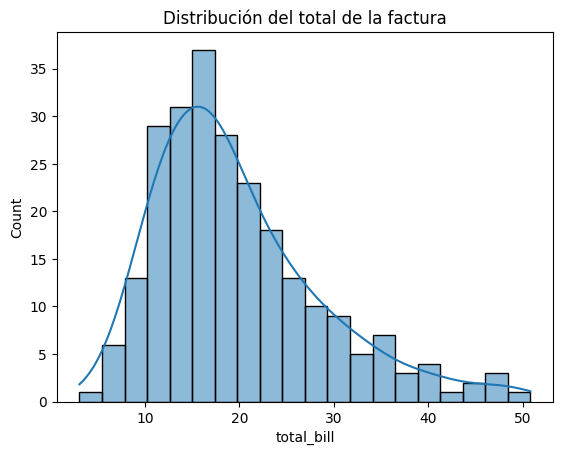

In [1112]:
sns.histplot(df['total_bill'], bins=20, kde=True)
plt.title('Distribución del total de la factura')
plt.show()

# Visualización multivariante

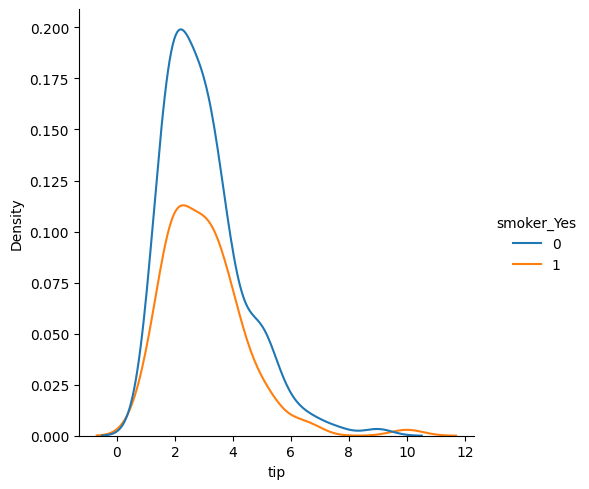

In [1113]:
# Crear un gráfico de densidad (KDE) para la columna "tip", diferenciando por la categoría "smoker_Yes"
sns.displot(df, x="tip", hue="smoker_Yes", kind="kde")
plt.show()

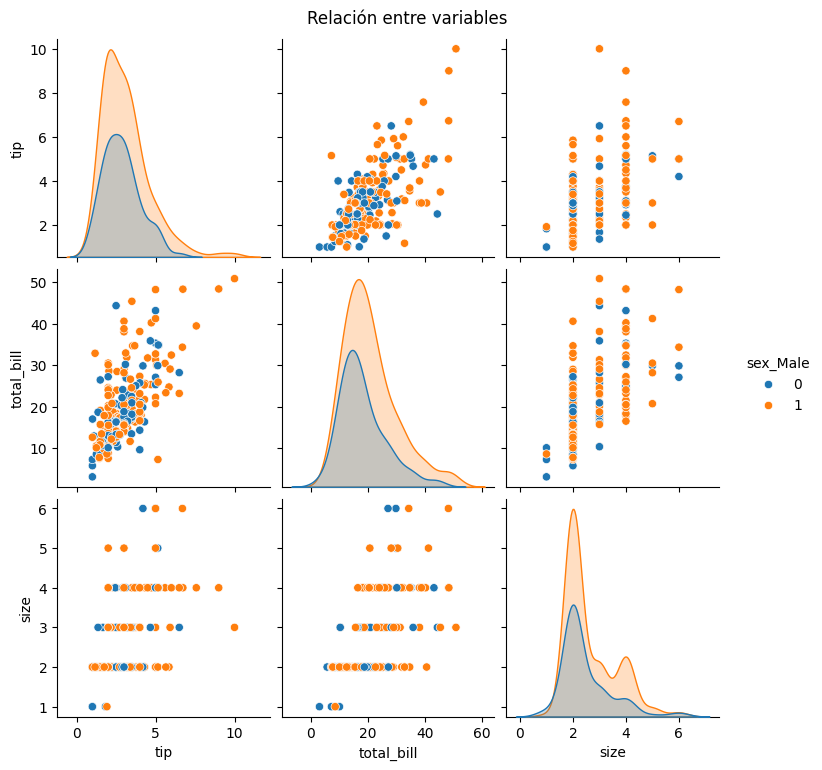

In [1114]:
# Crear un conjunto de gráficos de dispersión y distribuciones para las variables seleccionadas
sns.pairplot(df[['tip', 'total_bill', 'size', 'sex_Male']], hue="sex_Male")
plt.suptitle("Relación entre variables", y=1.02)
plt.show()

Text(0.5, 1.0, 'Distribución de la propina en las comidas')

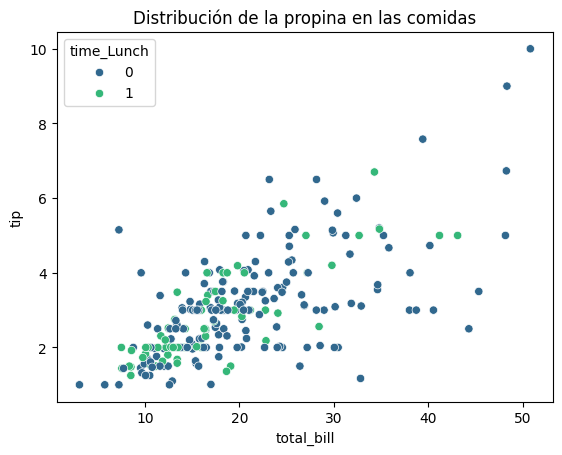

In [1115]:
# Crear un gráfico de dispersión diferenciando por el tiempo de comida (almuerzo o cena)
sns.scatterplot(data=df, x="total_bill", y="tip", hue="time_Lunch", palette='viridis')
plt.title('Distribución de la propina en las comidas')

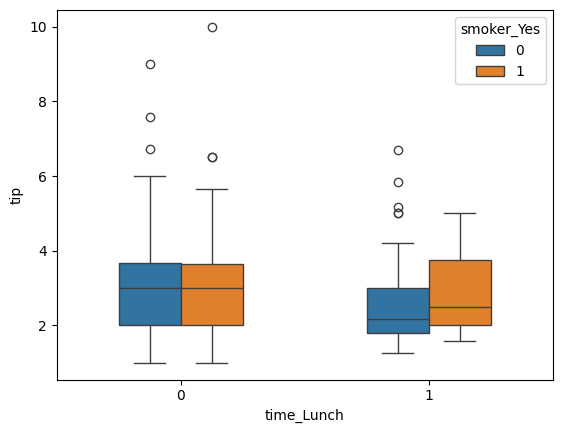

In [1116]:
# Crear un gráfico de caja diferenciando por el tiempo de comida y el hábito de fumar
sns.boxplot(x="time_Lunch", y="tip", data=df, hue="smoker_Yes", width=0.5)

# Añadir una leyenda al gráfico
legend = plt.legend(loc=1)
legend.set_title("smoker_Yes")


Text(0.5, 1.02, 'Correlación entre variables')

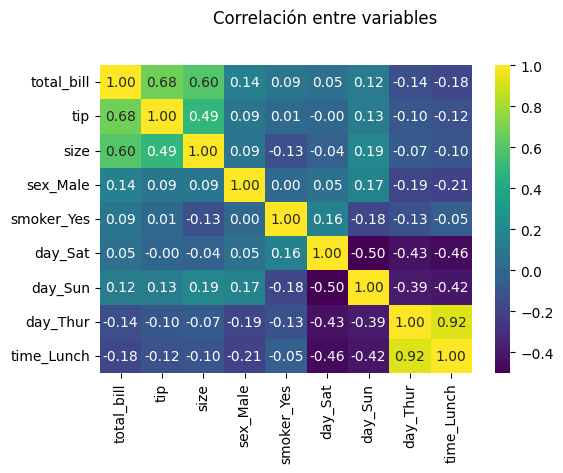

In [1117]:
# Crear un mapa de calor de la correlación entre variables numéricas
plt.figure(figsize=(6, 4))  # Establecer el tamaño de la figura
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis", fmt=".2f")
plt.suptitle("Correlación entre variables", y=1.02)

# **3.Crear un modelo de regresión con scikit-learn**

# Dividir el dataset en conjunto de entrenamiento y prueba

Al entrenar el modelo sin quitar los outliers los resultados no fueron óptimos.
*   Resultados con Particionamiento 70/30:


      Mean Absolute Error: 0.7171821289867403
      Mean Squared Error: 0.9318323215911068
      R^2 Score: 0.2930966744126678
*   Resultados con Particionamiento 80/20:


      Mean Absolute Error: 0.6671331480264893
      Mean Squared Error: 0.7033566017436106
      R^2 Score: 0.43730181943482493
*   Resultados con Particionamiento 90/10:


      Mean Absolute Error: 0.6683630901492029
      Mean Squared Error: 0.7272956736299647
      R^2 Score: 0.34038121383097697

In [1118]:
#Preparar los parámetros de entrada
#X = df[['total_bill','size'	,'sex_Male','smoker_Yes',	'day_Sat','day_Sun','day_Thur','time_Lunch']]
#Preparar los parámetros de salida
#y = df['tip']

Al entrenar el modelo quitando los outliers los resultados fueron mejores pero no óptimos.
*   Resultados con Particionamiento 70/30:


      Mean Absolute Error: 0.6359866787568991
      Mean Squared Error: 0.6376671832241004
      R^2 Score: 0.39427240510753614
*   Resultados con Particionamiento 80/20:


      Mean Absolute Error: 0.6477441491244897
      Mean Squared Error: 0.6571641532471155
      R^2 Score: 0.38189622067447326
*   Resultados con Particionamiento 90/10:


      Mean Absolute Error: 0.6436394997184223
      Mean Squared Error: 0.6318552746159913
      R^2 Score: 0.427148043722239

In [1119]:
def drop_outliers(df):
    # Crea una copia del DataFrame original
    df_copy = df.copy()

    # Itera sobre las columnas del DataFrame
    for column in df_copy.columns:
        # Verifica si el tipo de datos de la columna es 'object'
        if df_copy[column].dtype == 'object':
            continue  # Si es 'object', pasa a la siguiente iteración del bucle

        # Calcula los cuartiles y el rango intercuartílico (IQR)
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calcula los límites inferior y superior para identificar outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Filtra los outliers y actualiza el DataFrame
        filter = (df_copy[column] >= lower_limit) & (df_copy[column] <= upper_limit)
        df_copy = df_copy[filter]

    # Devuelve el DataFrame sin outliers
    return df_copy

In [1120]:
# Limpieza de outliers en el DataFrame original (df)
df_no_outliers = drop_outliers(df)

# Imprimir las dimensiones del DataFrame original y del DataFrame sin outliers
print(f"Dimensiones del DataFrame original: {df.shape}")
print(f"Dimensiones del DataFrame sin outliers: {df_no_outliers.shape}")

Dimensiones del DataFrame original: (244, 9)
Dimensiones del DataFrame sin outliers: (222, 9)


In [1121]:
#Preparar los parámetros de entrada
X = df_no_outliers[['total_bill','size'	,'sex_Male','smoker_Yes',	'day_Sat','day_Sun','day_Thur','time_Lunch']]
#Preparar los parámetros de salida
y = df_no_outliers['tip']

# Probar con varias particiones

Al ejercer varias pruebas optamos  por la partición 90/10 por dar el mejor resultado.

In [1122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [1123]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1124]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Escalar los datos

In [1125]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión

In [1126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **4.Evaluar la precisión del modelo**

# Realizar predicciones en el conjunto de prueba

In [1127]:
y_pred = model.predict(X_test)

# Evaluar el modelo

In [1128]:
# y_test son los valores reales, y_pred son las predicciones del modelo
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas calculadas
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 0.6436394997184223
Mean Squared Error: 0.6318552746159913
R^2 Score: 0.427148043722239


Mirar qué versión de Python se ha usado para poder indicarlo después en el despliegue

In [1129]:
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

Mirar qué versión de scikilearn se ha usado para poder indicarlo después en el despliegue

In [1130]:
sklearn.__version__

'1.2.2'

# Guardar el modelo entrenado

In [1131]:
joblib.dump(model, 'model.joblib')

['model.joblib']